In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.db as db
import rubin_sim.maf.plots as plots
import healpy as hp

In [2]:
nside = 32

opsdb = db.OpsimDatabase('baseline_v2.0_10yrs.db')
outDir = '2DSlicers'
resultsDb = db.ResultsDb(outDir=outDir)
plotFuncs = [plots.TwoDMap()]

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database observations with constraint note not like "%DD%" for columns ['rotSkyPos', 'fieldDec', 'fieldRA', 'night']
Found 1992771 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "%DD%"" constraint now.
Plotting complete.


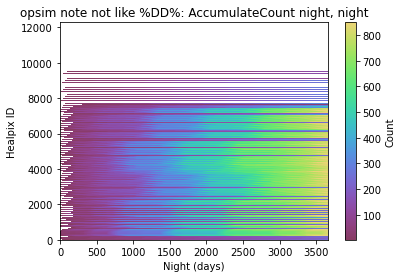

In [3]:
# Plot the total number of visits to each healpixel as a function of time
metric = metrics.AccumulateCountMetric(bins=np.arange(366*10))
slicer = slicers.HealpixSlicer(nside=nside)
plotDict = {'colorMax': 850, 'xlabel': 'Night (days)'}
sql='note not like "%DD%"'
bundle = metricBundles.MetricBundle(
    metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup(
    {0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)



/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

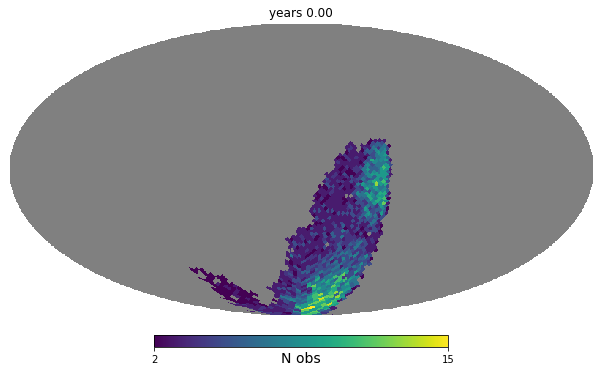

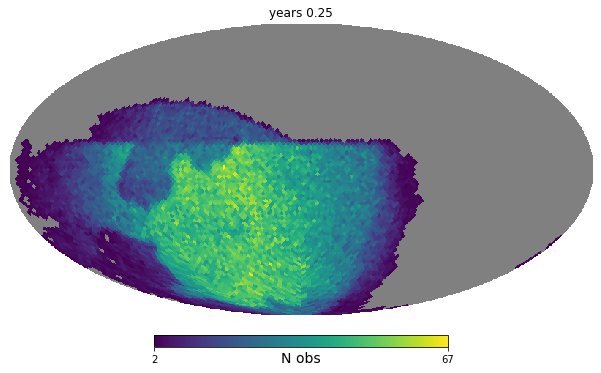

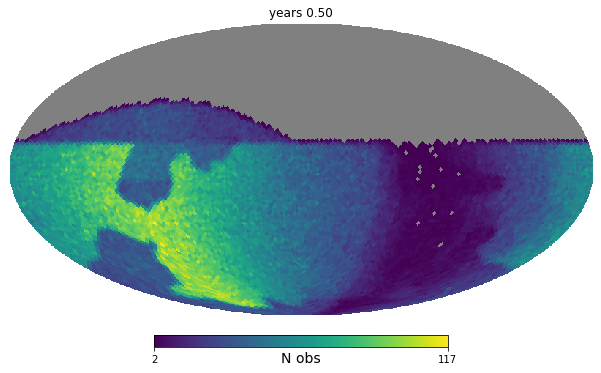

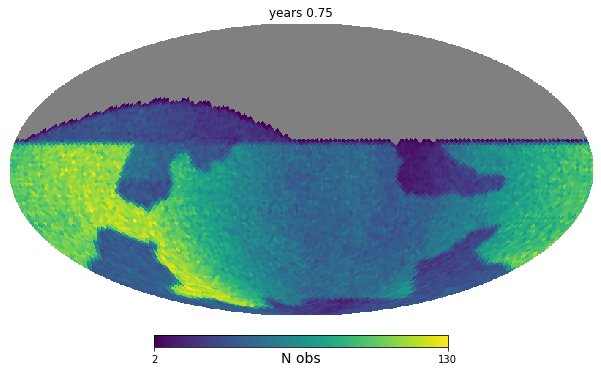

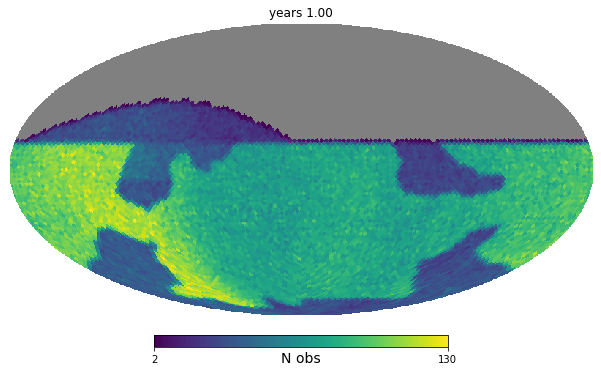

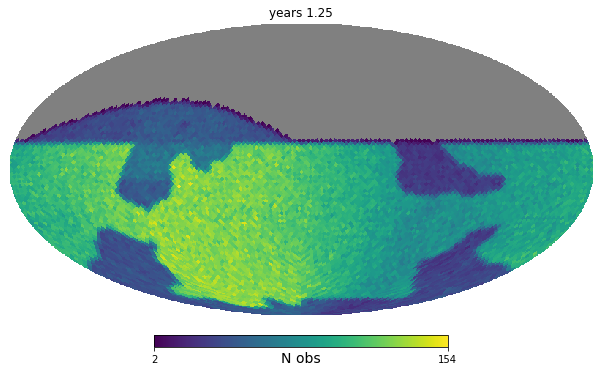

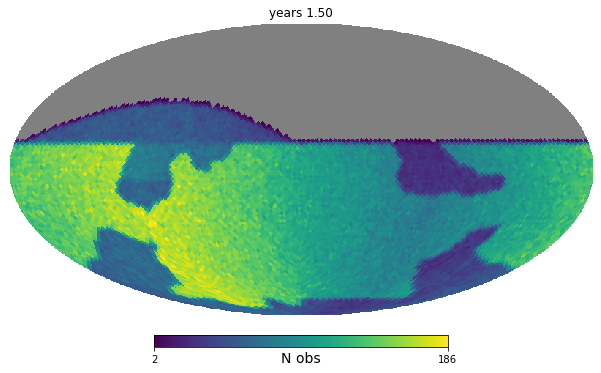

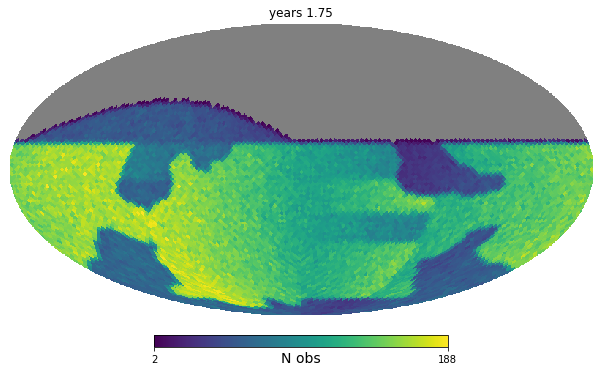

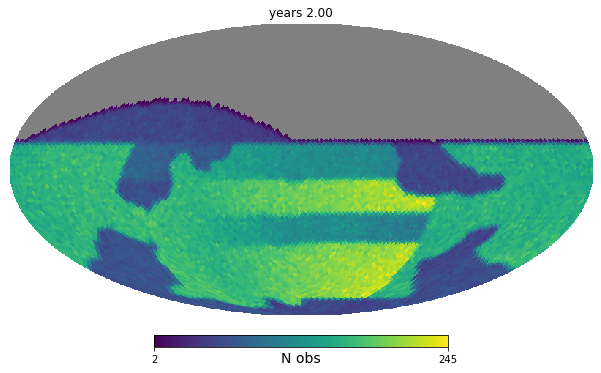

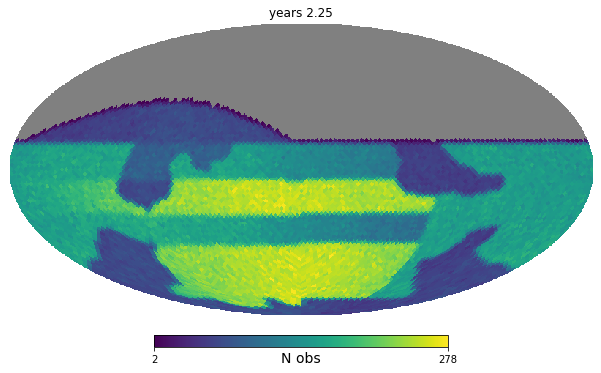

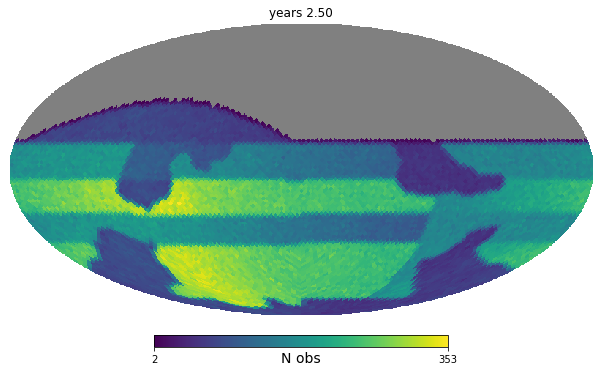

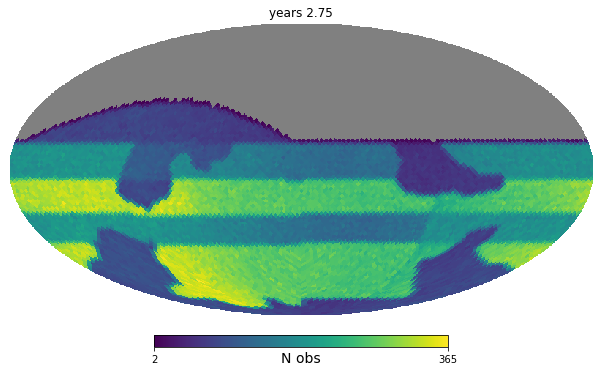

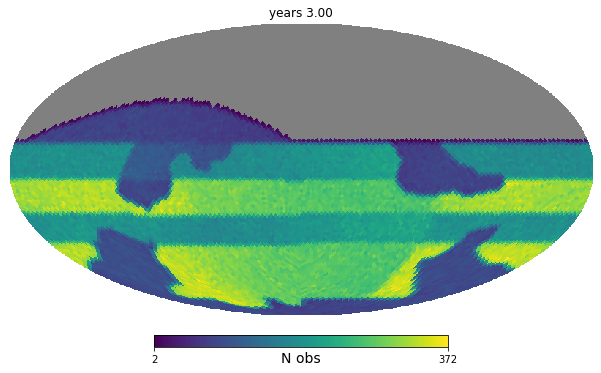

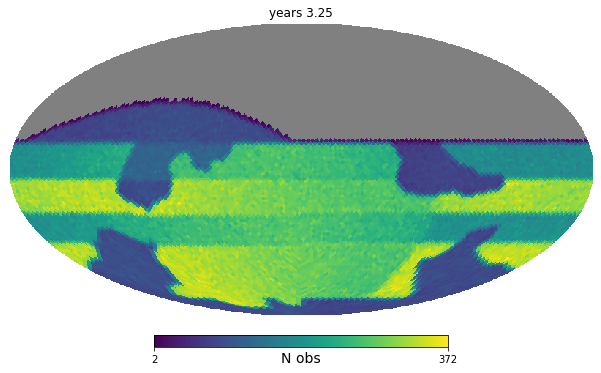

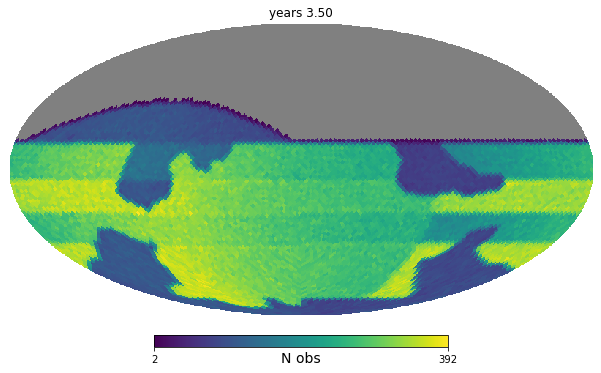

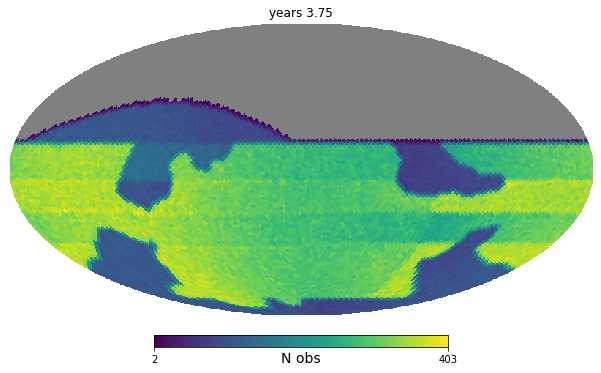

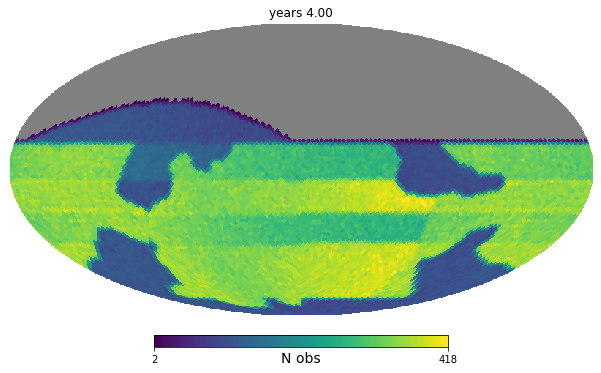

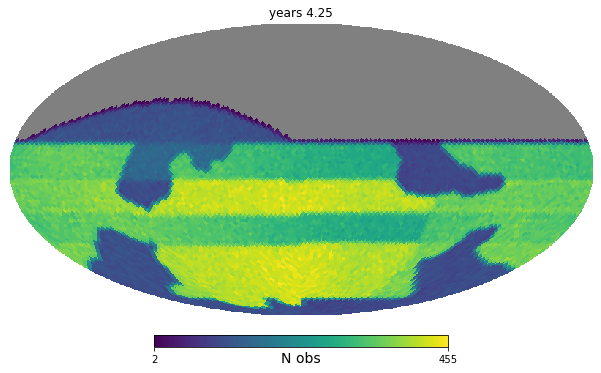

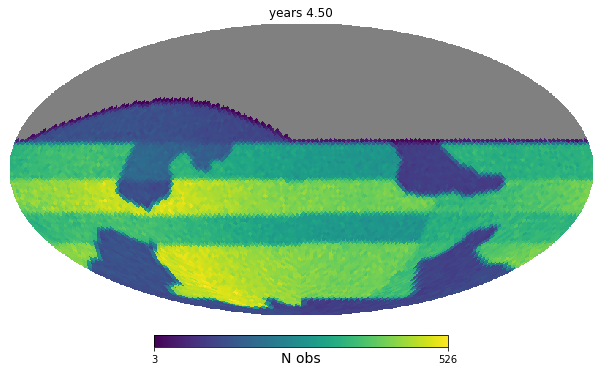

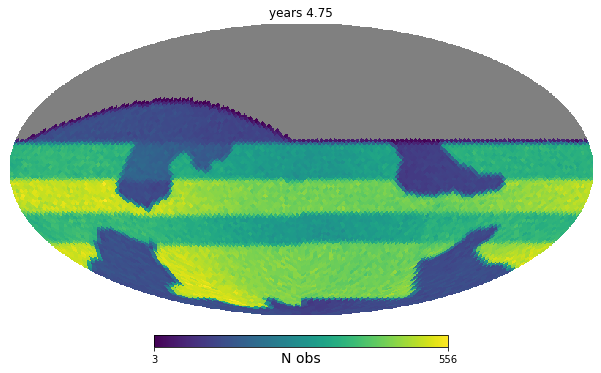

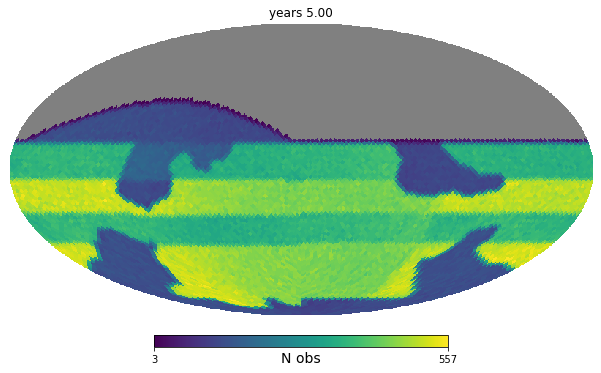

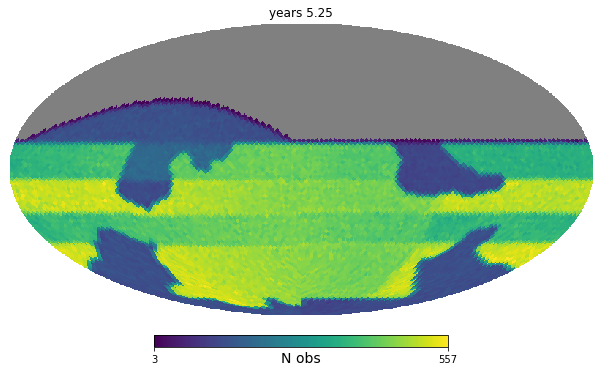

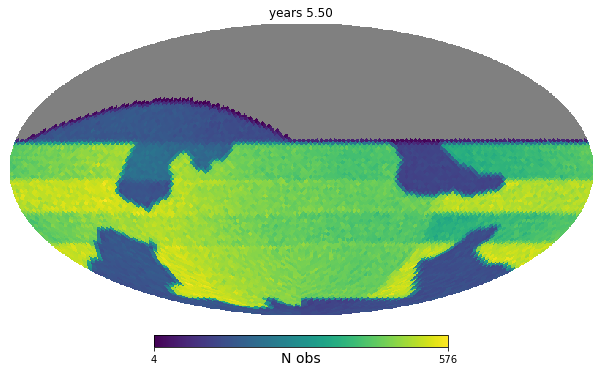

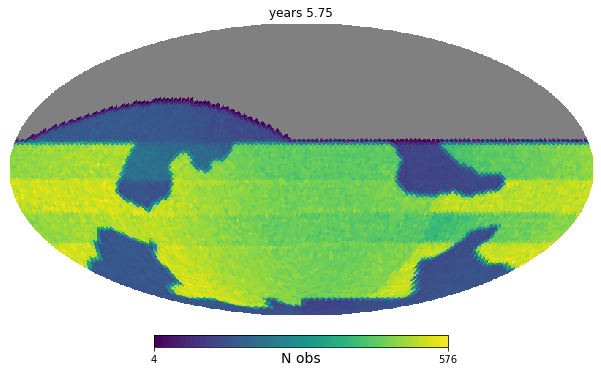

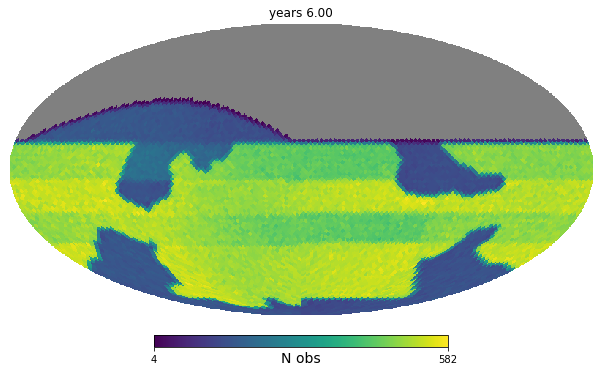

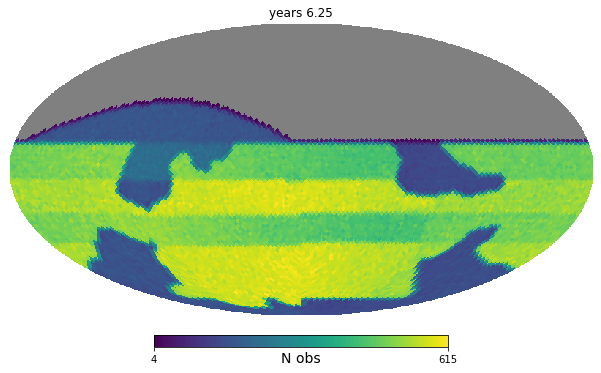

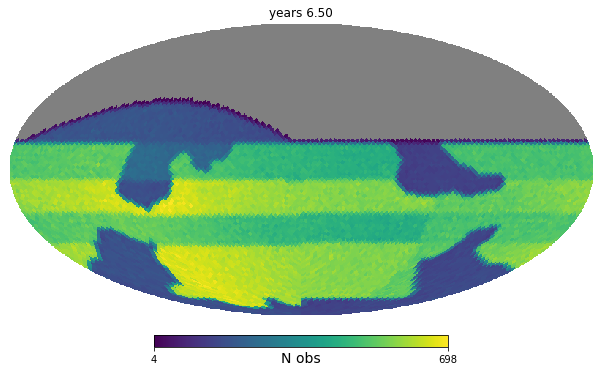

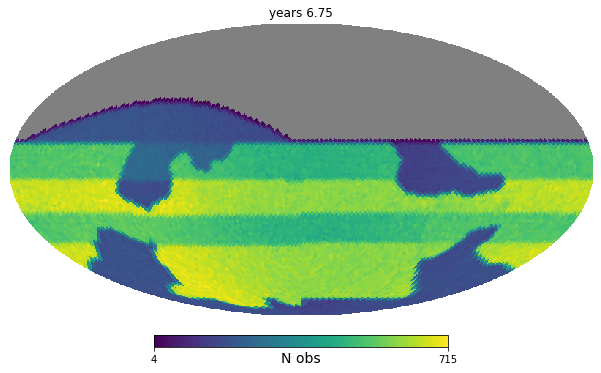

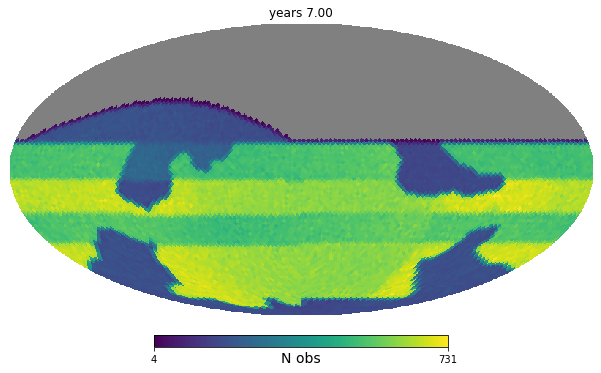

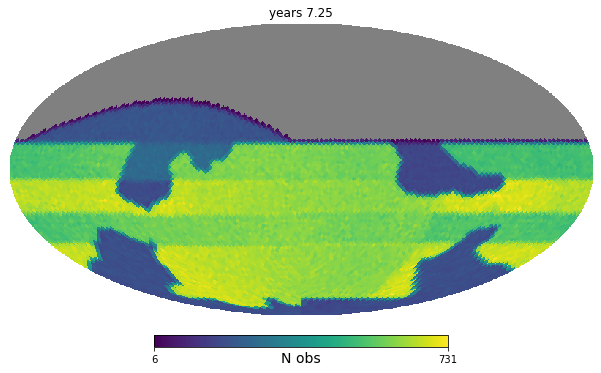

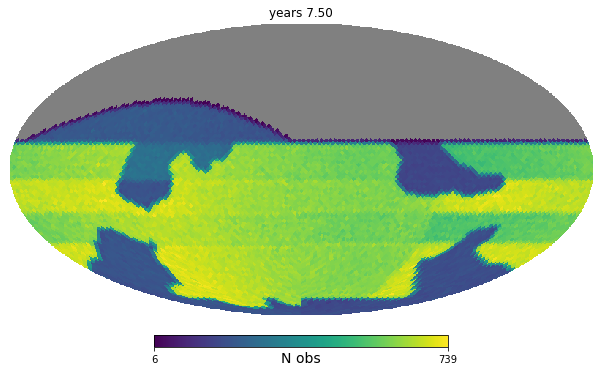

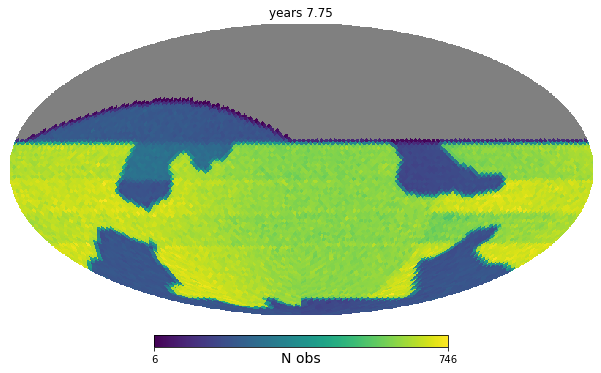

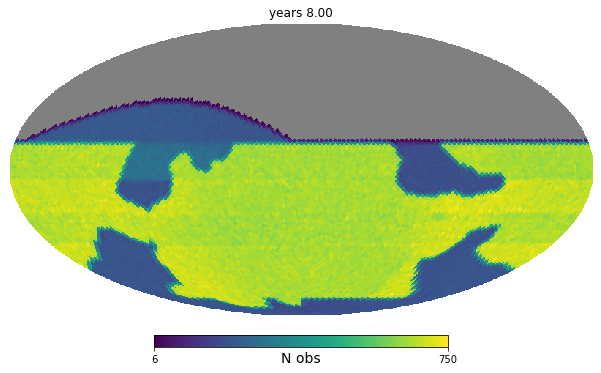

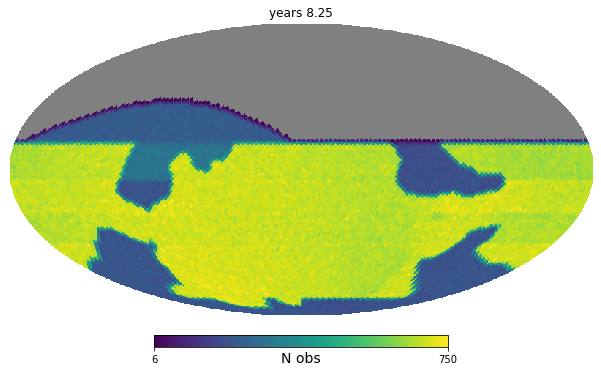

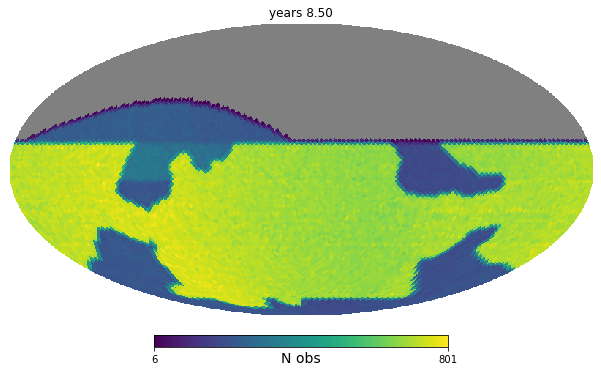

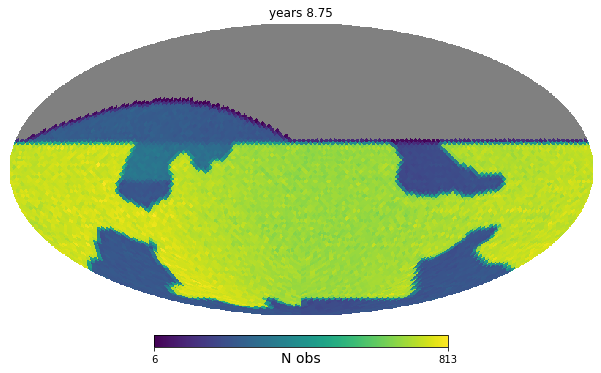

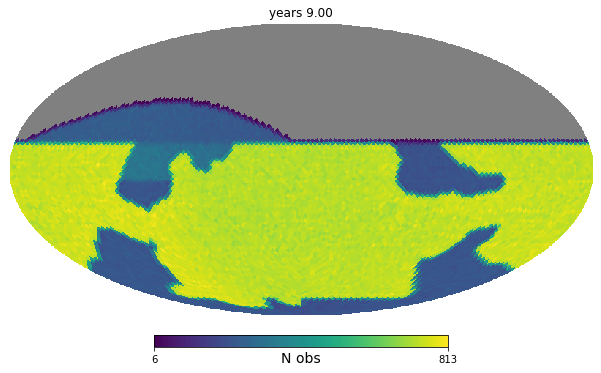

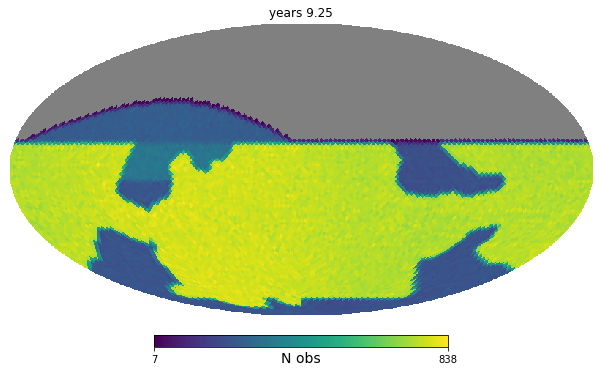

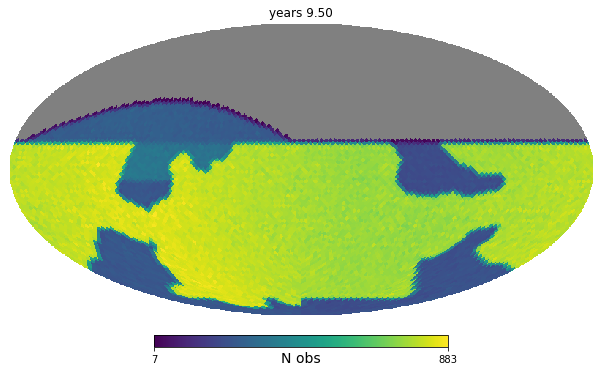

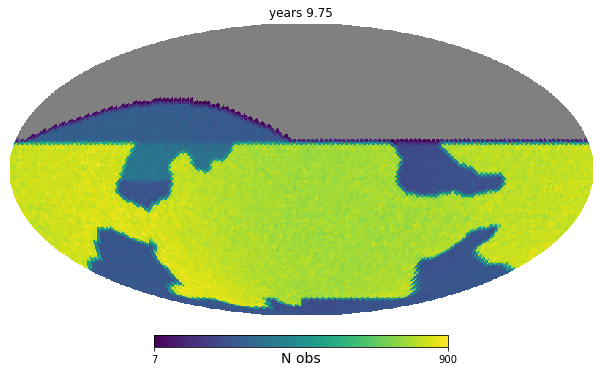

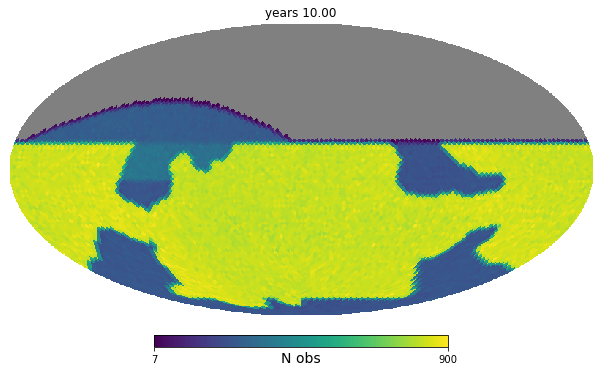

In [4]:
for i in np.arange(0,10.25, 0.25):
    hp.mollview(bundle.metricValues[:,int(np.round(365*i))], title='years %.2f' % i, unit='N obs')